In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the VS Chill Inhibitor and VS Velocity Baton Datasets.

In [16]:
chill_inhibitor_df = pd.read_csv('./data/vs_chill_inhibitor.csv')
velocity_baton_df = pd.read_csv('./data/vs_velocity_baton.csv')

Create the occurrence matrices for each weapon and generate the labels.

In [17]:
chill_inhibitor_cm = chill_inhibitor_df.drop('perk', axis=1).values
chill_inhibitor_values = chill_inhibitor_cm.flatten()
chill_labels = []

for index, row in chill_inhibitor_df.iterrows():
    for column in chill_inhibitor_df.columns:
        if column == 'perk':
            continue
        chill_labels.append(f'{row['perk']} + {column}')


velocity_baton_cm = velocity_baton_df.drop('perk', axis=1).values
velocity_baton_values = velocity_baton_cm.flatten()
velocity_labels = []

for index, row in velocity_baton_df.iterrows():
    for column in velocity_baton_df.columns:
        if column == 'perk':
            continue
        velocity_labels.append(f'{row['perk']} + {column}')

We can now visualize the drop rates of rolls on each weapon:

At this scale, we would expect a relatively even distribution. But you can clearly see that some rolls have absurdly low drop rates (0%-1%)

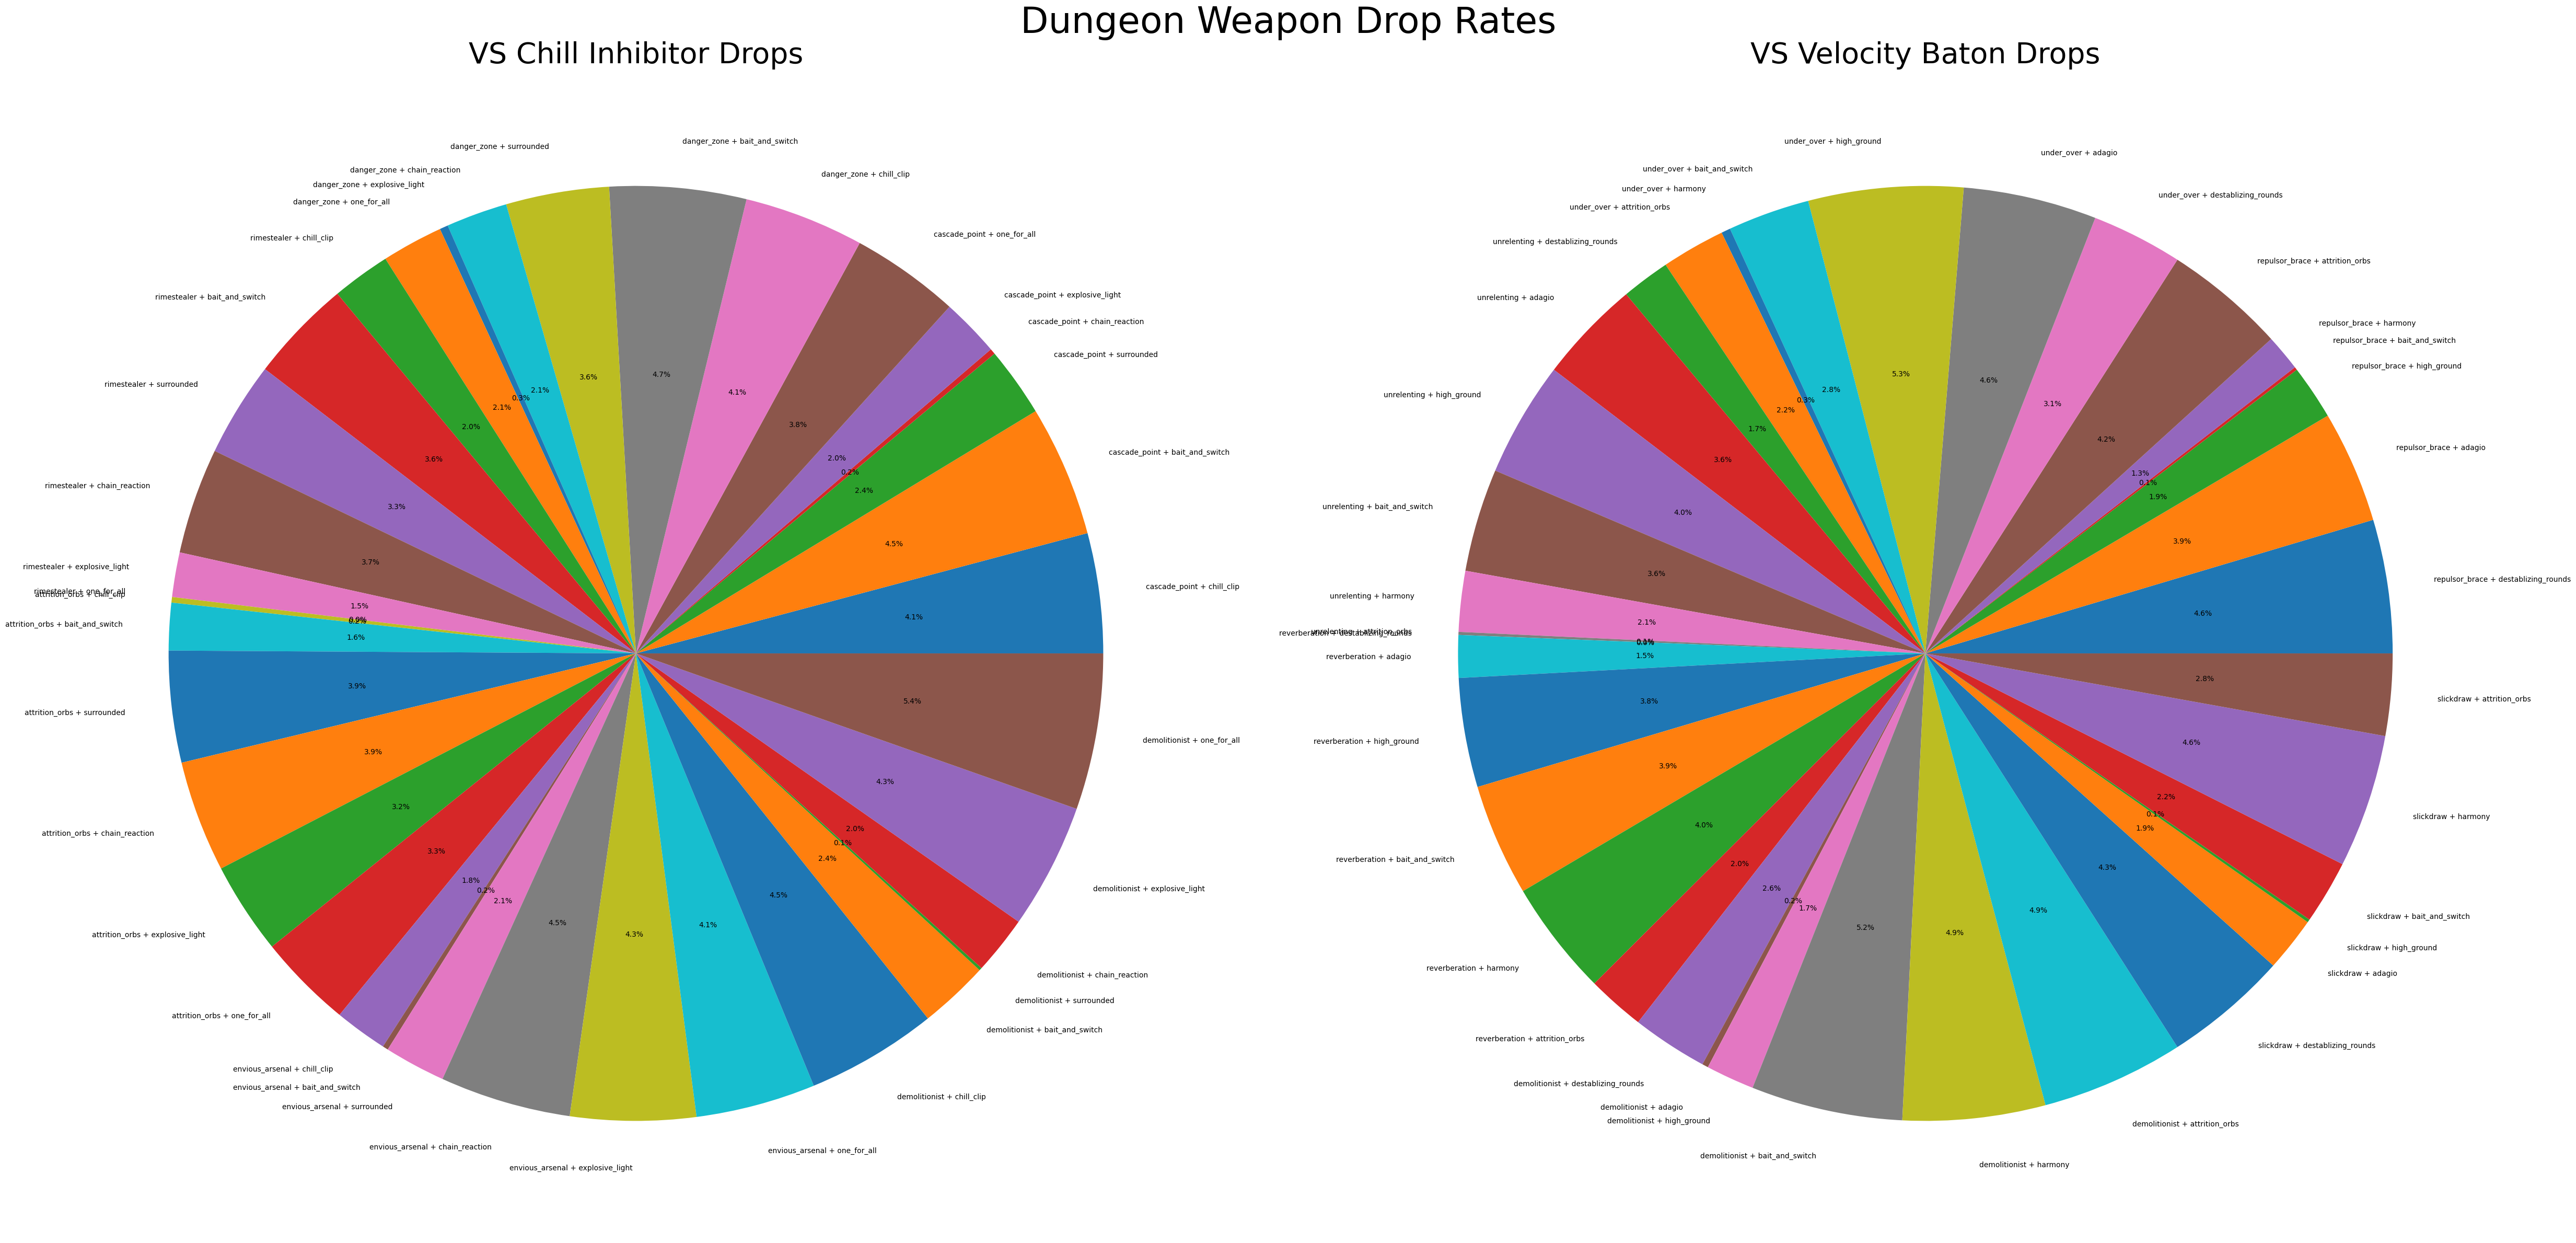

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50, 25))

patches, texts, things = ax1.pie(chill_inhibitor_values, labels=chill_labels, autopct='%1.1f%%')
ax1.set_title('VS Chill Inhibitor Drops', fontsize=40)
# ax1.legend(patches, chill_labels, loc='best')

patches, texts, things = ax2.pie(velocity_baton_values, labels=velocity_labels, autopct='%1.1f%%')
ax2.set_title('VS Velocity Baton Drops', fontsize=40)
# ax2.legend(patches, velocity_labels, loc='best')

fig.suptitle('Dungeon Weapon Drop Rates', fontsize=50)
plt.tight_layout()
plt.show()

Now, we can look at the distribution across rolls that already have one of the two perks desired (in this case, **Envious Arsenal** and **Bait and Switch**). 

The expected rate for each roll would be roughly **1/11**, or about **9%**.

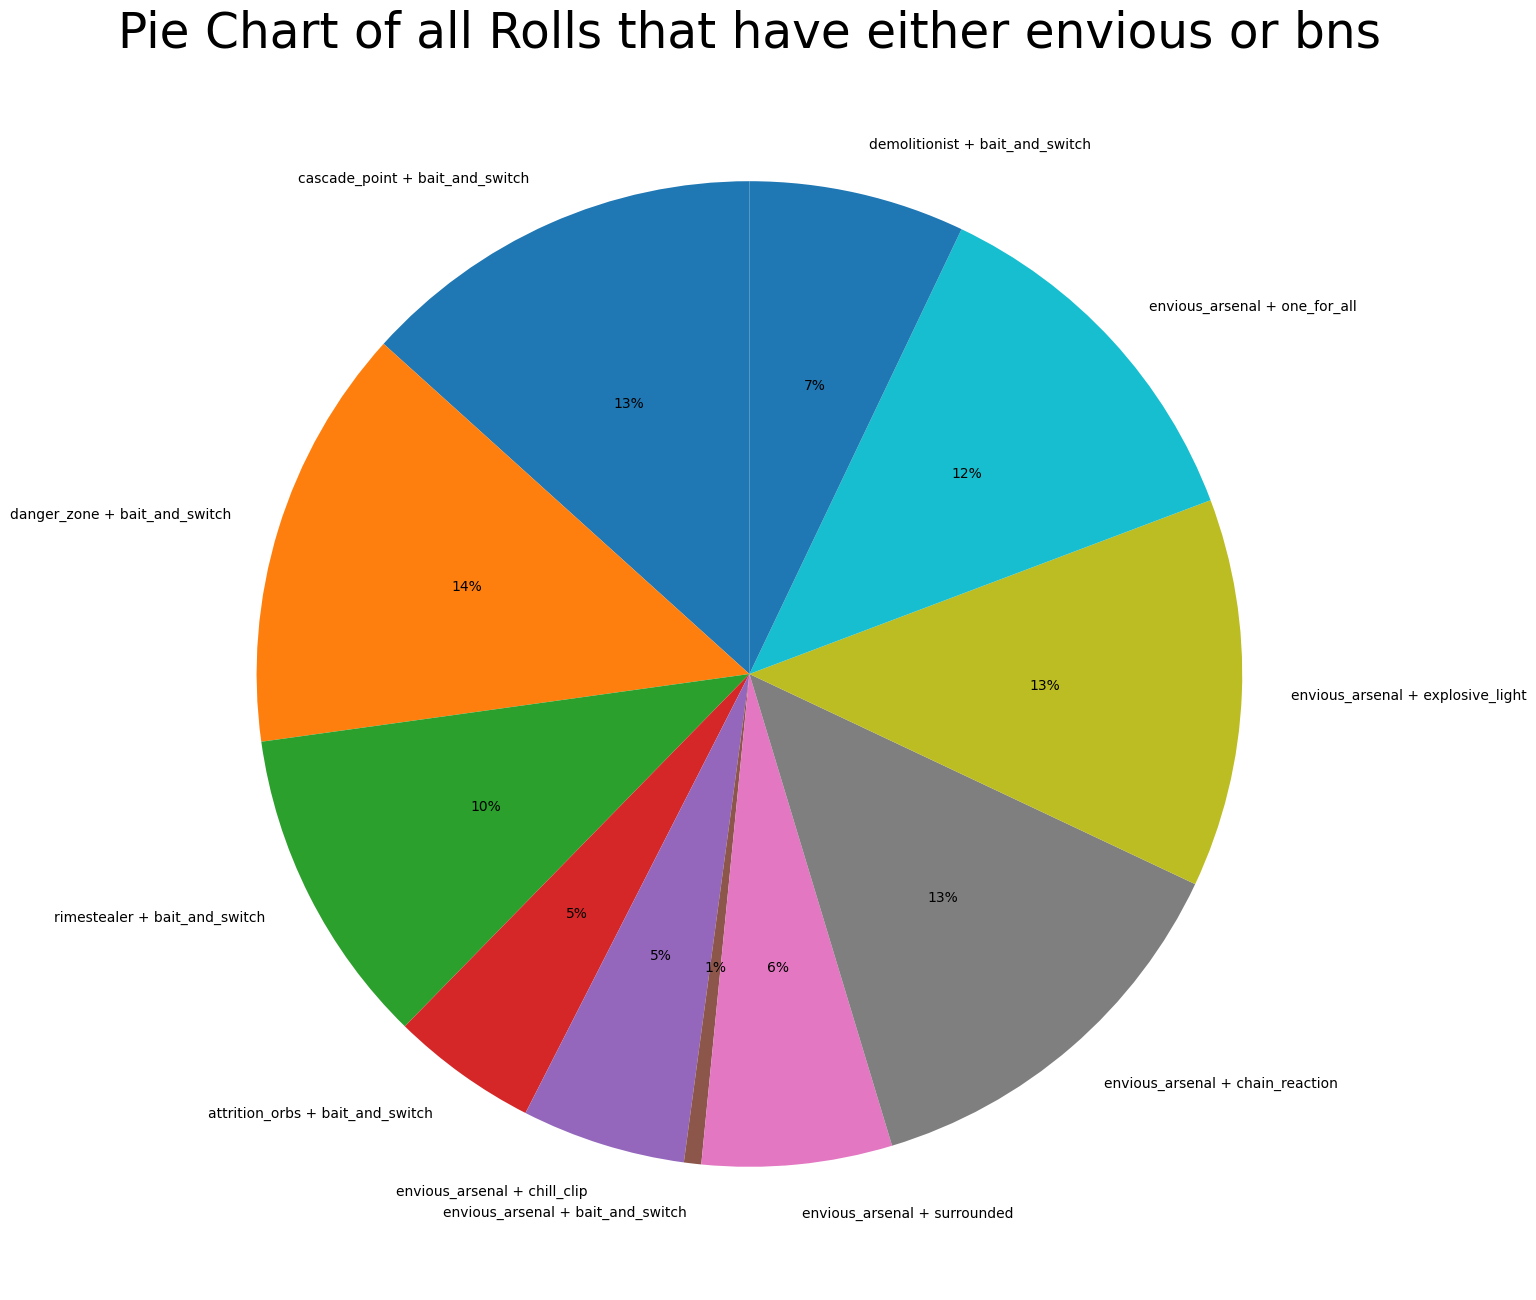

In [19]:
# create a matrix mask to only grab certain values
matrix_repr = np.full(chill_inhibitor_cm.shape, 'n', dtype=str)
selected_column = 1
selected_row = 4
matrix_repr[selected_row, :] = 'y'
matrix_repr[:, selected_column] = 'y'

# grab labels + values located in good spots on the mask
selected_values = []
labels = []
for i in range(chill_inhibitor_cm.shape[0]):
    for j in range(chill_inhibitor_cm.shape[1]):
        if matrix_repr[i, j] == 'y':
            selected_values.append(chill_inhibitor_cm[i, j])
            labels.append(f'{chill_inhibitor_df["perk"][i]} + {chill_inhibitor_df.columns[j+1]}')
            
plt.figure(figsize=(16, 16))
plt.pie(selected_values, labels=labels, autopct='%0.0f%%', startangle=90)
plt.title('Pie Chart of all Rolls that have either envious or bns', fontsize=35)
plt.show()

Visualizing the heatmaps of the drops:

Darker shades mean **more** weapons dropped with the given roll. Lighter shades mean **fewer** of the drops had that roll.

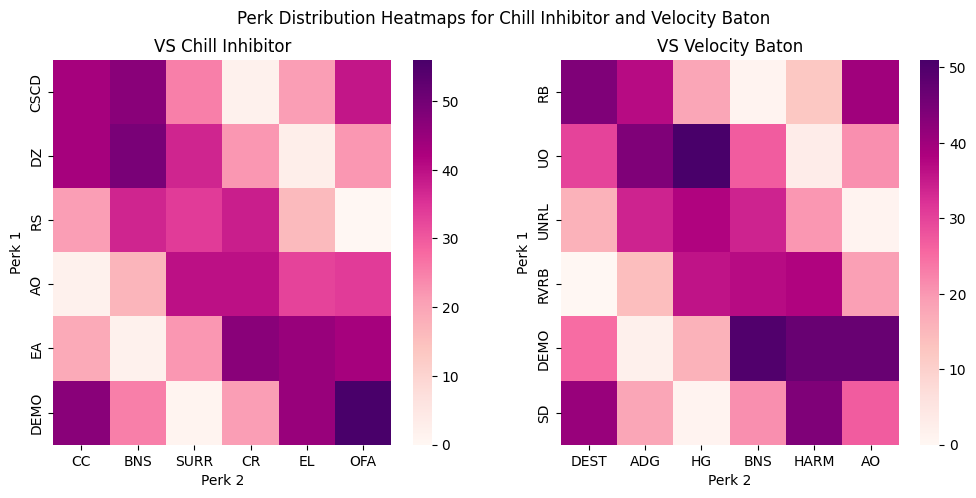

In [20]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# two heatmaps
sns.heatmap(chill_inhibitor_cm, ax=axes[0], cmap='RdPu')
sns.heatmap(velocity_baton_cm, ax=axes[1], cmap='RdPu')

# labels
axes[0].set_xlabel('Perk 2')
axes[0].set_ylabel('Perk 1')
axes[0].set_xticklabels(['CC', 'BNS', 'SURR', 'CR', 'EL', 'OFA'])
axes[0].set_yticklabels(['CSCD', 'DZ', 'RS', 'AO', 'EA', 'DEMO'])
axes[0].set_title('VS Chill Inhibitor')

# labels
axes[1].set_xlabel('Perk 2')
axes[1].set_ylabel('Perk 1')
axes[1].set_xticklabels(['DEST', 'ADG', 'HG', 'BNS', 'HARM', 'AO'])
axes[1].set_yticklabels(['RB', 'UO', 'UNRL', 'RVRB', 'DEMO', 'SD'])
axes[1].set_title('VS Velocity Baton')

plt.suptitle('Perk Distribution Heatmaps for Chill Inhibitor and Velocity Baton')
plt.show()

As you can see, a clear pattern is emerging, which can be visualized in the trait columns. We will do this by drawing lines on the rare perk combinations, and dragging down the top half of the 4th column to be at the bottom:

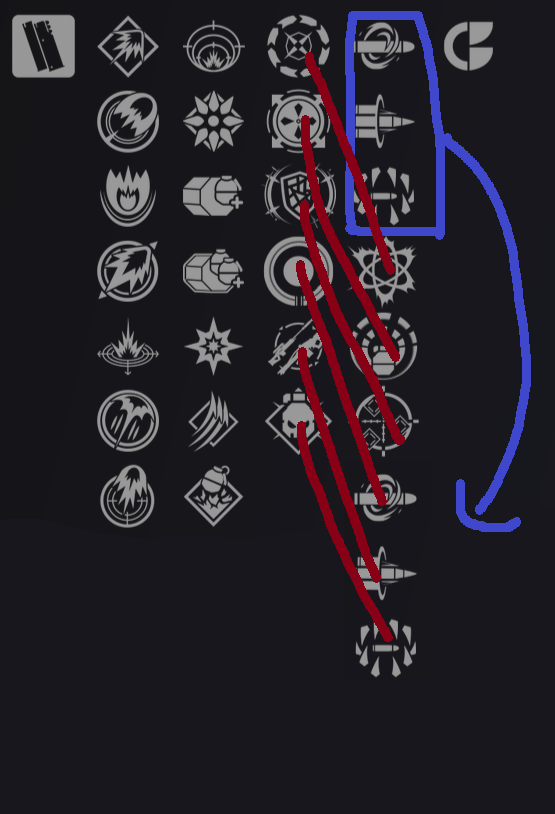

This indicates the pattern continues by looping through the end of the list of traits in the 4th column, where the 1st in the left column with the 4th perk in the right column will be rare. The 2nd in the left with the 5th in the right the 3rd in the left with the 6th in the right, and so on so forth. 

3D Visulization of the drops:

Alternatively, we can visualize the distribution with a surface plot.

If the rolls had a relatively even distribution, we could expect to see a relatively **smooth**, **flat** plane. 

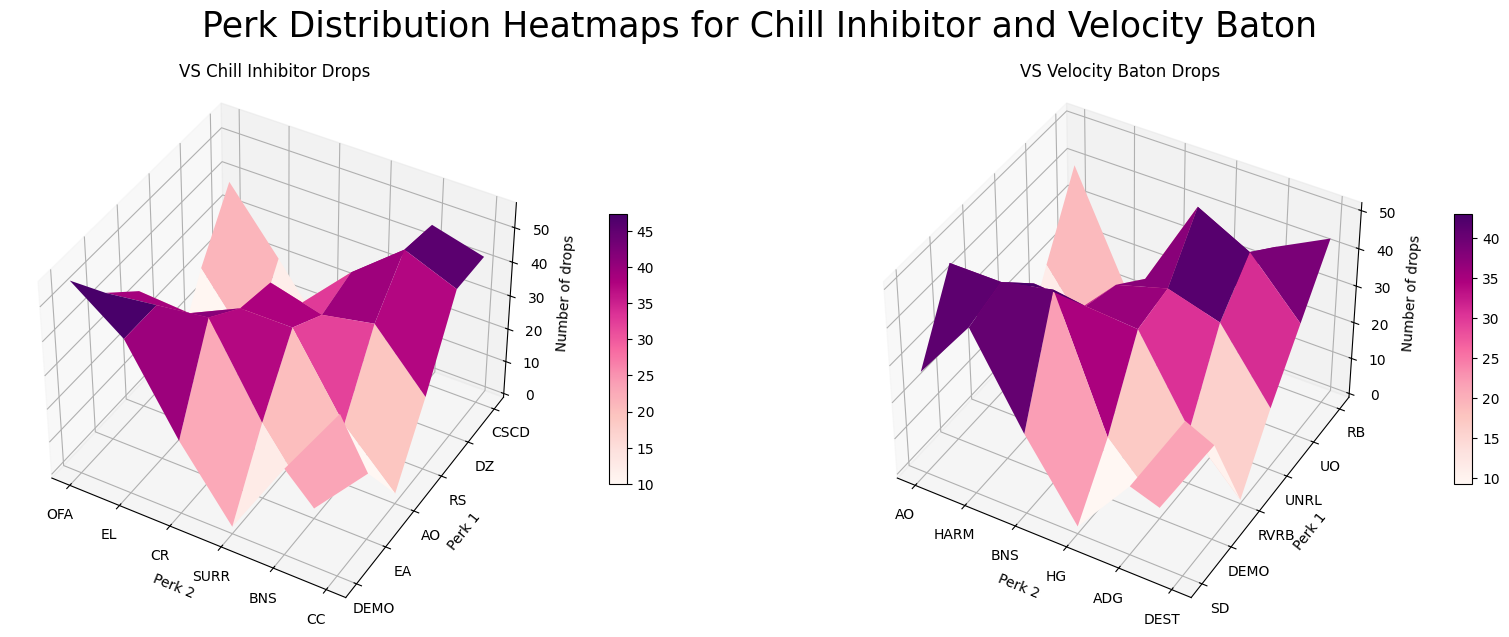

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(20, 7))

chill_inhibitor_cm = np.array(chill_inhibitor_cm)

# generate mesh
x = np.arange(chill_inhibitor_cm.shape[1])
y = np.arange(chill_inhibitor_cm.shape[0])
X, Y = np.meshgrid(x, y)

# plot the VS Chill Inhibitor plane
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, chill_inhibitor_cm, cmap='RdPu', edgecolor='none')
ax1.set_xticks(x)
ax1.set_xticklabels(['CC', 'BNS', 'SURR', 'CR', 'EL', 'OFA'])
ax1.set_yticks(y)
ax1.set_yticklabels(['CSCD', 'DZ', 'RS', 'AO', 'EA', 'DEMO'])
ax1.set_xlabel('Perk 2')
ax1.set_ylabel('Perk 1')
ax1.set_zlabel('Number of drops')
ax1.set_title('VS Chill Inhibitor Drops')

# set the viewing angle
ax1.view_init(elev=40, azim=120)


velocity_baton_cm = np.array(velocity_baton_cm)

# generate mesh
x = np.arange(velocity_baton_cm.shape[1])
y = np.arange(velocity_baton_cm.shape[0])
X, Y = np.meshgrid(x, y)

# plot the VS Velocity Baton plane
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, velocity_baton_cm, cmap='RdPu', edgecolor='none', alpha=1)
ax2.set_xticks(x)
ax2.set_xticklabels(['DEST', 'ADG', 'HG', 'BNS', 'HARM', 'AO'])
ax2.set_yticks(y)
ax2.set_yticklabels(['RB', 'UO', 'UNRL', 'RVRB', 'DEMO', 'SD'])
ax2.set_xlabel('Perk 2')
ax2.set_ylabel('Perk 1')
ax2.set_zlabel('Number of drops')
ax2.set_title('VS Velocity Baton Drops')

# set the viewing angle
ax2.view_init(elev=40, azim=120)

# create the colorbars for the plots
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=15, pad=0.1)
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=15, pad=0.1)

plt.suptitle('Perk Distribution Heatmaps for Chill Inhibitor and Velocity Baton', fontsize=25)
plt.show()

You can see that we do not. This indicates an imbalance in the drop rates for the given rolls.